# Import dependencies

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)


tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)
print(c)

2024-01-19 13:08:54.646629: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 13:08:54.646666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 13:08:54.647269: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 13:08:54.652733: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-19 13:08:55.167523: W tensorflow/compiler/tf2

1 Physical GPUs, 1 Logical GPUs
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


2024-01-19 13:08:55.857549: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-19 13:08:55.873476: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-19 13:08:55.873519: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-19 13:08:55.875491: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-19 13:08:55.875526: I external/local_xla/xla/stream_executor

# Load datasets and extract images

In [2]:
dataset = np.load('../Datasets/pneumoniamnist.npz')
print("dataset keys: ", pd.DataFrame(dataset).head())

# extract images
train_images = dataset['train_images']
val_images = dataset['val_images']
test_images = dataset['test_images']

# extract labels
train_labels = dataset['train_labels']
val_labels = dataset['val_labels']
test_labels = dataset['test_labels']

dataset keys:                0
0  train_images
1    val_images
2   test_images
3  train_labels
4    val_labels


# Get image dimensions

In [3]:
train_images_shape = np.shape(train_images)
train_labels_shape = np.shape(train_labels)
val_images_shape = np.shape(val_images)
val_labels_shape = np.shape(val_labels)
test_images_shape = np.shape(test_images)
test_labels_shape = np.shape(test_labels)

print("train_images_shape: ", train_images_shape)
print("train_labels_shape: ", train_labels_shape)
print("val_images_shape: ", val_images_shape)
print("val_labels_shape: ", val_labels_shape)
print("test_images_shape: ", test_images_shape)
print("test_labels_shape: ", test_labels_shape)

train_images_shape:  (4708, 28, 28)
train_labels_shape:  (4708, 1)
val_images_shape:  (524, 28, 28)
val_labels_shape:  (524, 1)
test_images_shape:  (624, 28, 28)
test_labels_shape:  (624, 1)


# Visualising images
1 is positive, 0 is negative (for pneumonia)

Test Image, case:  [1]


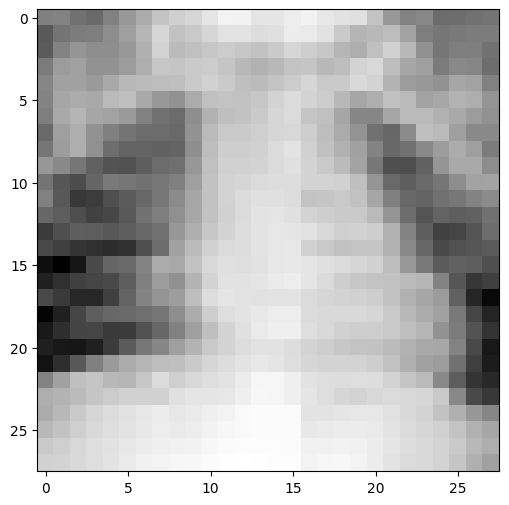

Test Image, case:  [1]


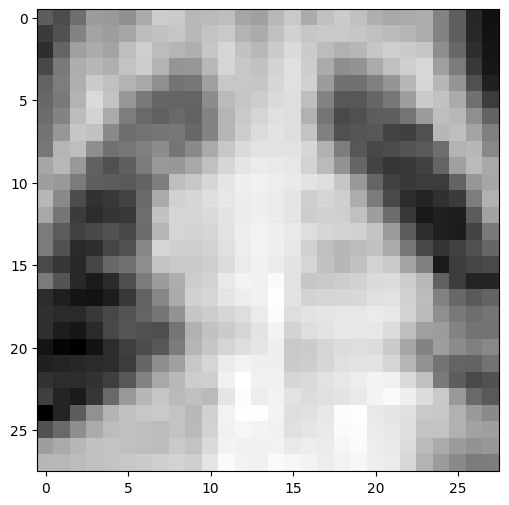

In [4]:
# 0 case
test_image = train_images[50]
test_image_label = train_labels[50]
# print('Test Image as array: ', test_image)
print('Test Image, case: ', test_image_label)
# Visualizing the same image
plt.figure(figsize=(6, 6))
plt.imshow(test_image, cmap='gray') 
plt.show()

# 1 case
test_image_1 = train_images[500]
test_image_label_1 = train_labels[500]
print('Test Image, case: ', test_image_label_1)
# Visualizing the same image
plt.figure(figsize=(6, 6))
plt.imshow(test_image_1, cmap='gray') 
plt.show()

# Normalize images to floating point, convert labels, and expand images to fit grey scale channel


In [5]:
# normalize images
train_images_norm = train_images.astype('float32') / 255
val_images_norm = val_images.astype('float32') / 255
test_images_norm = test_images.astype('float32') / 255

# convert labels
train_labels_conv = tf.keras.utils.to_categorical(train_labels)
val_labels_conv = tf.keras.utils.to_categorical(val_labels)
test_labels_conv = tf.keras.utils.to_categorical(test_labels)

# expand image shape
train_images_exp = np.expand_dims(train_images_norm, axis=-1)  # Add an extra dimension for the channel
val_images_exp = np.expand_dims(val_images_norm, axis=-1)
test_images_exp = np.expand_dims(test_images_norm, axis=-1)

# see new shapes
train_images_shape_new = np.shape(train_images_exp)
train_labels_shape_new = np.shape(train_labels_conv)
val_images_shape_new = np.shape(val_images_exp)
val_labels_shape_new = np.shape(val_labels_conv)
test_images_shape_new = np.shape(test_images_exp)
test_labels_shape_new = np.shape(test_labels_conv)

print("train_images_shape: ", train_images_shape_new)
print("train_labels_shape: ", train_labels_shape_new)
print("val_images_shape: ", val_images_shape_new)
print("val_labels_shape: ", val_labels_shape_new)
print("test_images_shape: ", test_images_shape_new)
print("test_labels_shape: ", test_labels_shape_new)

train_images_shape:  (4708, 28, 28, 1)
train_labels_shape:  (4708, 2)
val_images_shape:  (524, 28, 28, 1)
val_labels_shape:  (524, 2)
test_images_shape:  (624, 28, 28, 1)
test_labels_shape:  (624, 2)


# Create CNN model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

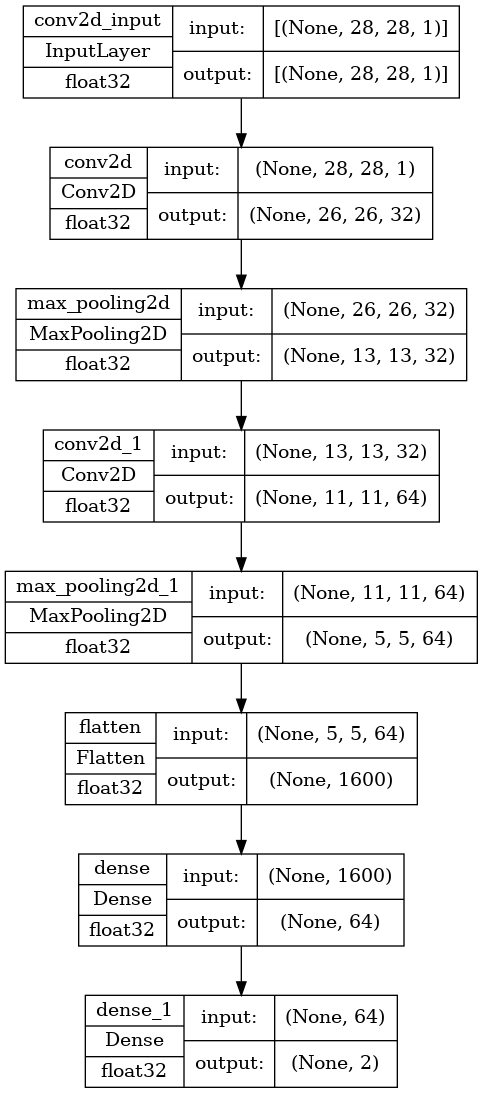

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=train_images_exp.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(test_labels_conv[0]), activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

tf.keras.utils.plot_model(model, to_file='base_model.png', show_shapes=True, 
    show_dtype=True)


# Train model

In [9]:
history = model.fit(train_images_exp, train_labels_conv, epochs=30, validation_data=(val_images_exp, val_labels_conv))

Epoch 1/30


2024-01-19 13:09:39.732426: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-19 13:09:39.803204: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-19 13:09:40.003656: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-19 13:09:40.039222: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f8990d17400 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-19 13:09:40.039257: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-01-19 13:09:40.043132: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1705669780.092593   31264 device_compil

148/148 [==============================] - 3s 12ms/step - loss: 0.3574 - accuracy: 0.8282 - val_loss: 0.1770 - val_accuracy: 0.9389
Epoch 2/30
148/148 [==============================] - 1s 7ms/step - loss: 0.1802 - accuracy: 0.9278 - val_loss: 0.1451 - val_accuracy: 0.9485
Epoch 3/30
148/148 [==============================] - 1s 8ms/step - loss: 0.1489 - accuracy: 0.9429 - val_loss: 0.1270 - val_accuracy: 0.9523
Epoch 4/30
148/148 [==============================] - 1s 10ms/step - loss: 0.1317 - accuracy: 0.9497 - val_loss: 0.1201 - val_accuracy: 0.9580
Epoch 5/30
148/148 [==============================] - 1s 10ms/step - loss: 0.1226 - accuracy: 0.9545 - val_loss: 0.0981 - val_accuracy: 0.9580
Epoch 6/30
148/148 [==============================] - 1s 9ms/step - loss: 0.1080 - accuracy: 0.9594 - val_loss: 0.1390 - val_accuracy: 0.9389
Epoch 7/30
148/148 [==============================] - 1s 9ms/step - loss: 0.1138 - accuracy: 0.9569 - val_loss: 0.0918 - val_accuracy: 0.9676
Epoch 8/30
148

# Plot training performance

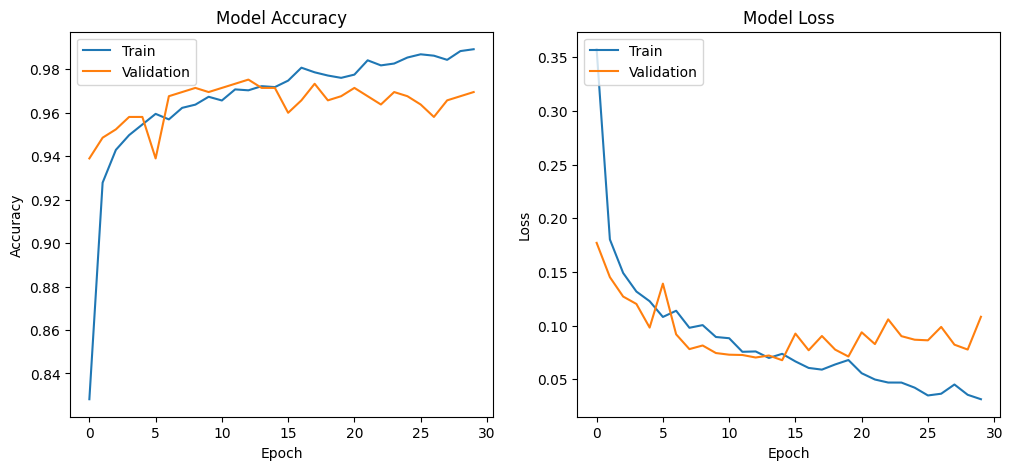

In [10]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


# Analyse test accuracy w/ Confusion matrix

20/20 [==============================] - 1s 12ms/step - loss: 0.6424 - accuracy: 0.8798
Test accuracy: 0.879807710647583
20/20 [==============================] - 0s 2ms/step


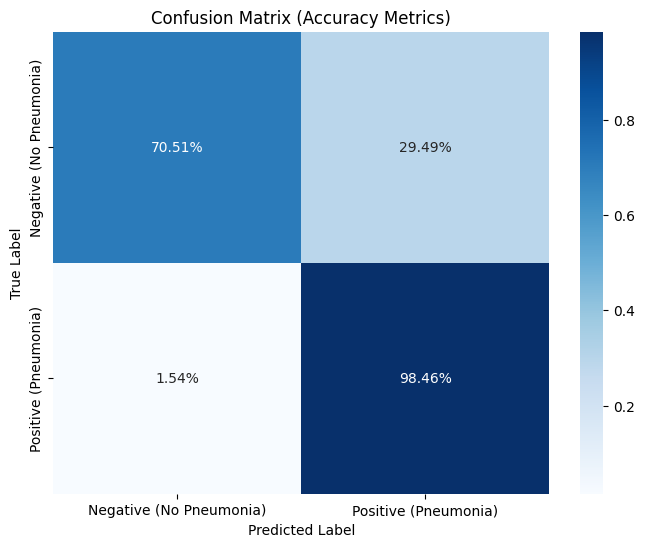

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_loss, test_acc = model.evaluate(test_images_exp, test_labels_conv)
print("Test accuracy:", test_acc)

predicted_classes = np.argmax(model.predict(test_images_exp), axis=1)
true_classes = np.argmax(test_labels_conv, axis=1)

cm = confusion_matrix(true_classes, predicted_classes)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

TN_rate = TN / (TN + FP)
FP_rate = FP / (TN + FP)
FN_rate = FN / (TP + FN)
TP_rate = TP / (TP + FN)

cm_normalized = np.array([[TN_rate, FP_rate], [FN_rate, TP_rate]])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Negative (No Pneumonia)', 'Positive (Pneumonia)'], yticklabels=['Negative (No Pneumonia)', 'Positive (Pneumonia)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Accuracy Metrics)')
plt.show()

In [ ]:
# Save the model
model.save("task_a_basic_model_81")

INFO:tensorflow:Assets written to: task_a_basic_model_81/assets


INFO:tensorflow:Assets written to: task_a_basic_model_81/assets


# Analyse Error Images

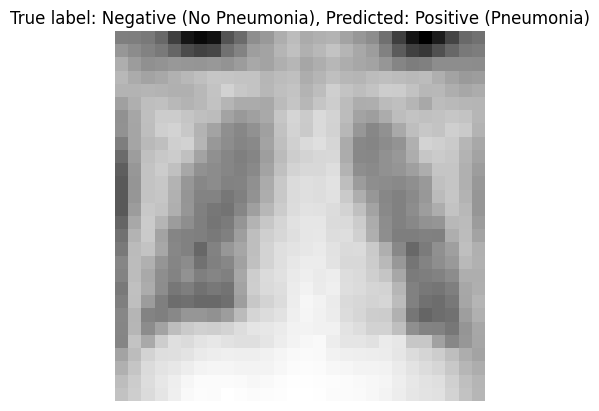

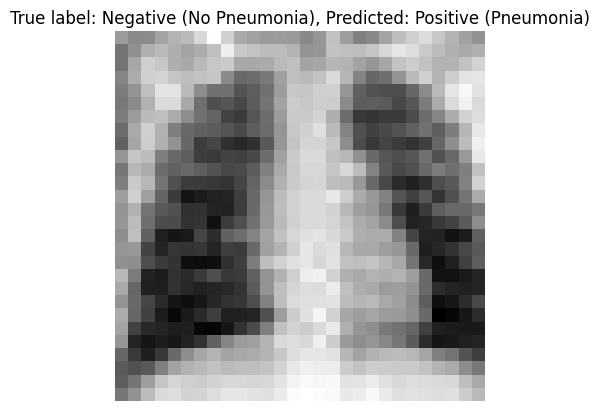

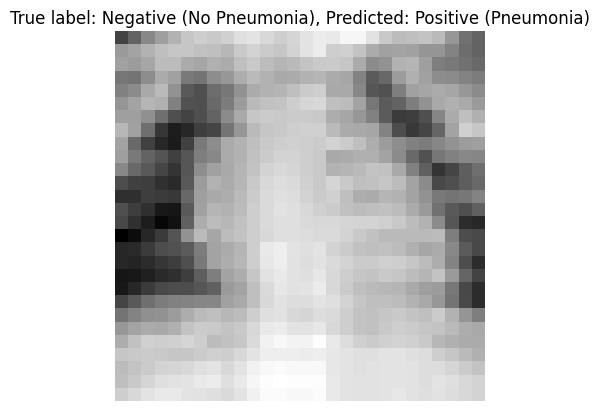

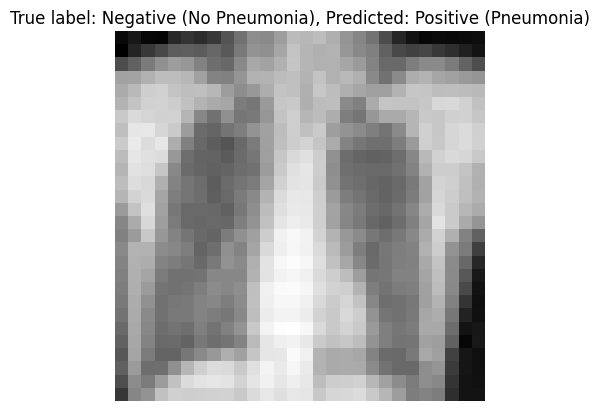

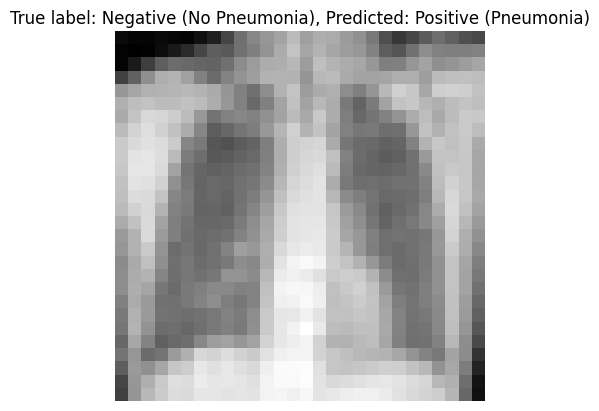

In [12]:
def label_to_string(label):
    return "Positive (Pneumonia)" if label == 1 else "Negative (No Pneumonia)"

misclassified_indices = np.where(predicted_classes != true_classes)[0]
sample_misclassified_indices = np.random.choice(misclassified_indices, 5, replace=False)

for i in sample_misclassified_indices:
    plt.imshow(test_images_exp[i].reshape(28, 28), cmap='gray')
    true_label_str = label_to_string(true_classes[i])
    predicted_label_str = label_to_string(predicted_classes[i])
    plt.title(f"True label: {true_label_str}, Predicted: {predicted_label_str}")
    plt.axis('off')
    plt.show()

# Analyse Distribution of data

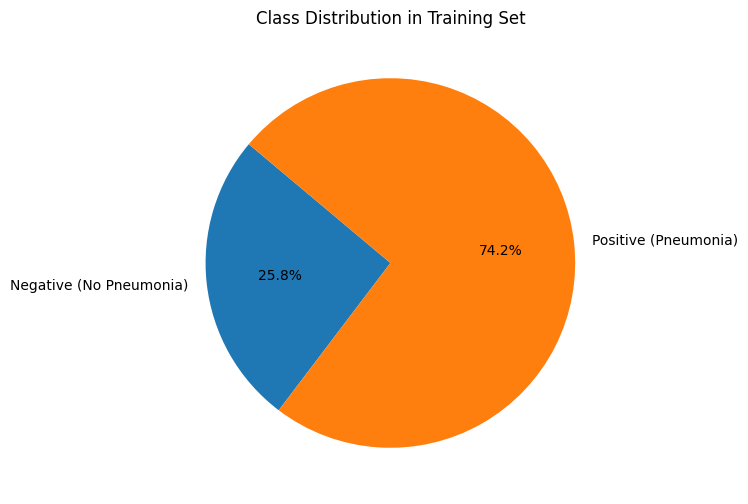

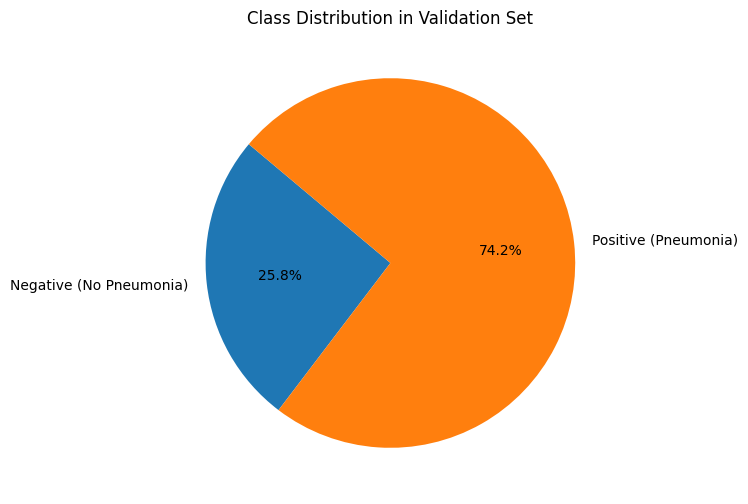

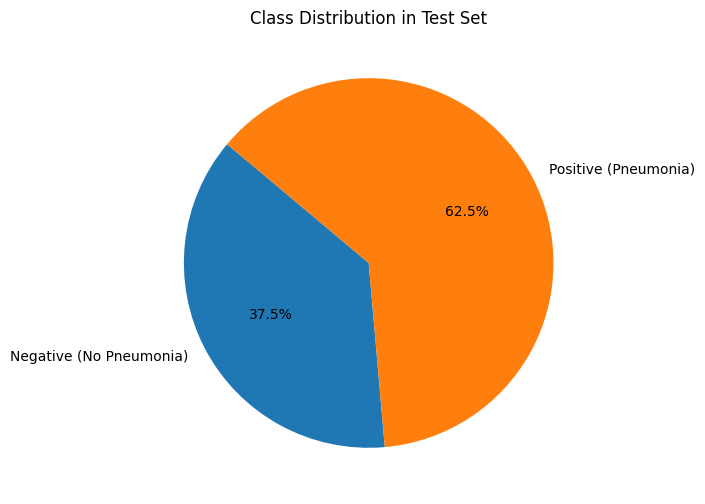

training count [1214. 3494.]


In [14]:
def plot_class_distribution(labels, dataset_name):
    class_counts = np.sum(labels, axis=0)
    class_labels = ['Negative (No Pneumonia)', 'Positive (Pneumonia)']

    plt.figure(figsize=(6, 6))
    plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Class Distribution in {dataset_name} Set')
    plt.show()
    return class_counts 

# Plot distribution for each dataset
train_count = plot_class_distribution(train_labels_conv, "Training")
val_count = plot_class_distribution(val_labels_conv, "Validation")
test_count = plot_class_distribution(test_labels_conv, "Test")
print("training count", train_count)


# Augmenting new data
From analysing the results, it can be seen that the model underperforms when it comes to predicting negative class and also overfits. We can try data augmentation to try and balance the classes and reduce overfitting on the postive classes.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import math

# # get counts for negative and positive classes
negative_train_count = train_count[0]
positive_train_count = train_count[1]
# calc how much augmented data is needed
total_synthetic_needed = positive_train_count - negative_train_count
augment_per_image = math.ceil(total_synthetic_needed / negative_train_count)

# Identifying indices of the negative class
negative_class_indices = np.where(np.argmax(train_labels_conv, axis=1) == 0)[0]

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
)

augmented_images = []
augmented_labels = []

for i in negative_class_indices:
    img = train_images_exp[i].reshape((1,) + train_images_exp[i].shape)
    generated_count = 0
    for x in datagen.flow(img, batch_size=1):
        augmented_images.append(x[0])
        augmented_labels.append(train_labels_conv[i])
        generated_count += 1
        if generated_count >= augment_per_image:
            break

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Combine with original training data
train_images_balanced = np.concatenate((train_images_exp, augmented_images))
train_labels_balanced = np.concatenate((train_labels_conv, augmented_labels))
train_images_balanced, train_labels_balanced = shuffle(train_images_balanced, train_labels_balanced)

# Compare original with augmented images

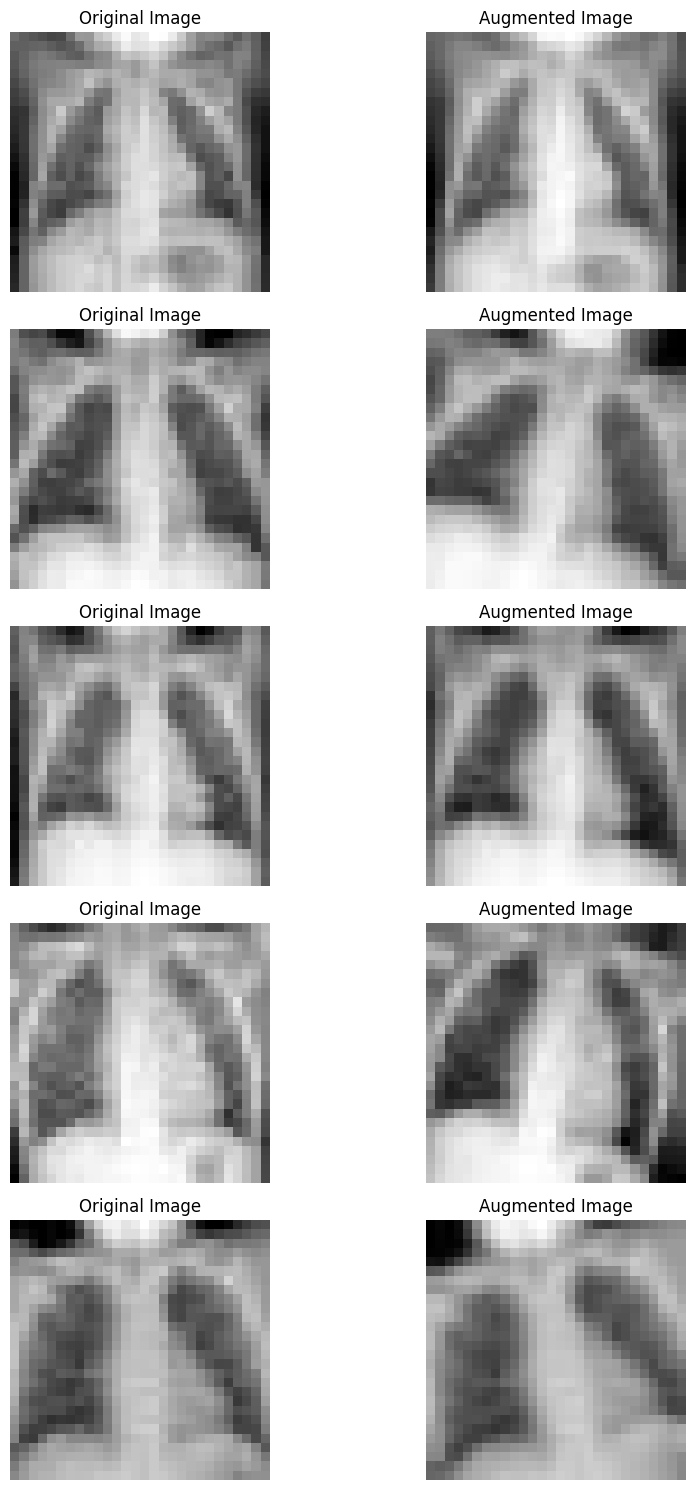

In [16]:
# Choose a small number of original images to display
num_images_to_display = 5  

# Set up a plot
fig, axes = plt.subplots(num_images_to_display, 2, figsize=(10, num_images_to_display * 3))

# Select random indices from the negative class
sample_indices = np.random.choice(negative_class_indices, num_images_to_display, replace=False)

for i, idx in enumerate(sample_indices):
    # Display original image
    axes[i, 0].imshow(train_images_exp[idx].reshape(28, 28), cmap='gray')
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis('off')
    
    # Generate and display one augmented image
    img = train_images_exp[idx].reshape((1,) + train_images_exp[idx].shape)
    for x in datagen.flow(img, batch_size=1):
        axes[i, 1].imshow(x[0].reshape(28, 28), cmap='gray')
        axes[i, 1].set_title("Augmented Image")
        axes[i, 1].axis('off')
        break  # Only generate one augmented image for comparison

plt.tight_layout()
plt.show()

# New distribution of training data

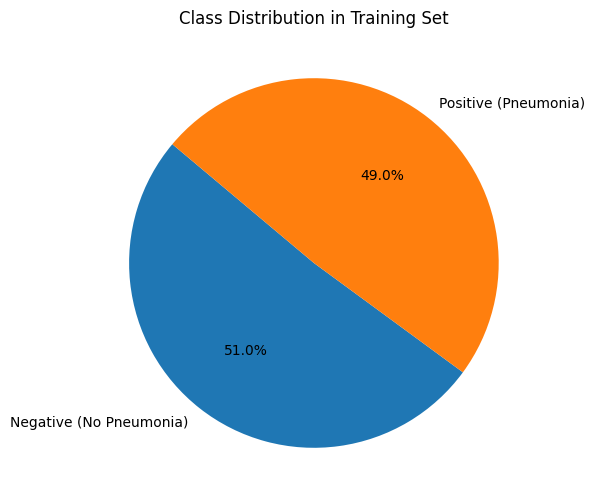

[3642. 3494.]


In [17]:
train_count_balanced = plot_class_distribution(train_labels_balanced, "Training")
print(train_count_balanced)

# Recreate and analyse the model using the new balanced training dataset

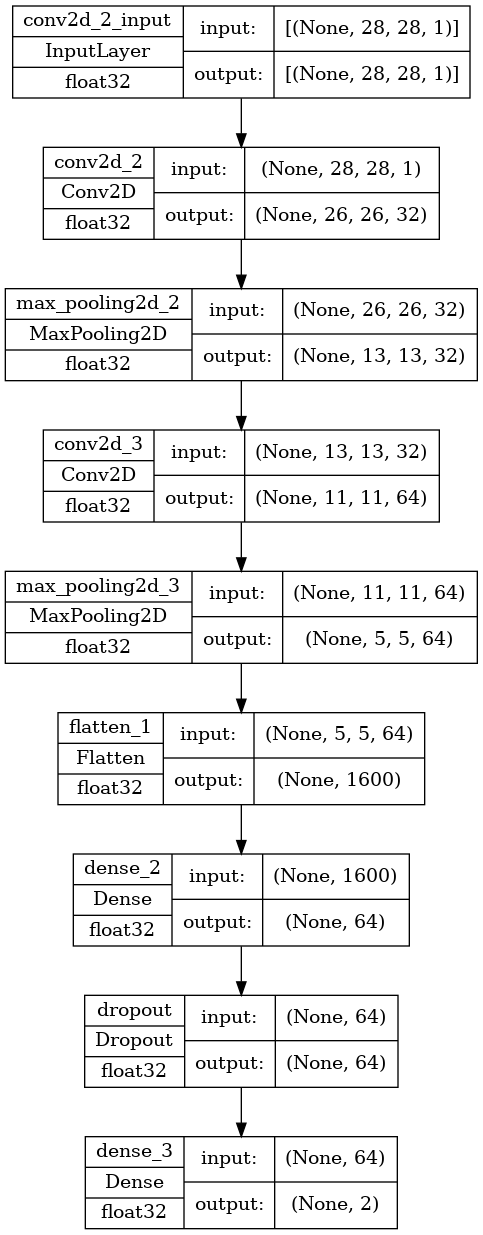

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Define the L2 regularization factor
l2_reg = 0.001

model_balanced = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(l2_reg), input_shape=train_images_balanced.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(l2_reg)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(l2_reg)),
    Dropout(0.5),
    Dense(len(test_labels_conv[0]), activation='softmax')
])

model_balanced.compile(optimizer="adam",  loss='categorical_crossentropy',
                metrics=['accuracy'])

tf.keras.utils.plot_model(model_balanced, to_file='base_model.png', show_shapes=True, 
    show_dtype=True)


# Train new model

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Train the model with early stopping
history_balanced = model_balanced.fit(
    train_images_balanced, 
    train_labels_balanced, 
    epochs=30,
    validation_data=(val_images_exp, val_labels_conv),
    callbacks=[early_stopping]
)

Epoch 1/30
223/223 [==============================] - 3s 8ms/step - loss: 0.4323 - accuracy: 0.8384 - val_loss: 0.3667 - val_accuracy: 0.8550
Epoch 2/30
223/223 [==============================] - 2s 8ms/step - loss: 0.2853 - accuracy: 0.9138 - val_loss: 0.2414 - val_accuracy: 0.9294
Epoch 3/30
223/223 [==============================] - 2s 8ms/step - loss: 0.2492 - accuracy: 0.9261 - val_loss: 0.2385 - val_accuracy: 0.9237
Epoch 4/30
223/223 [==============================] - 2s 9ms/step - loss: 0.2360 - accuracy: 0.9309 - val_loss: 0.1732 - val_accuracy: 0.9523
Epoch 5/30
223/223 [==============================] - 2s 9ms/step - loss: 0.2270 - accuracy: 0.9365 - val_loss: 0.1807 - val_accuracy: 0.9485
Epoch 6/30
223/223 [==============================] - 2s 9ms/step - loss: 0.2077 - accuracy: 0.9407 - val_loss: 0.2025 - val_accuracy: 0.9447
Epoch 7/30
223/223 [==============================] - 2s 10ms/step - loss: 0.1998 - accuracy: 0.9423 - val_loss: 0.2338 - val_accuracy: 0.9179
Epoch

# Analyse new model

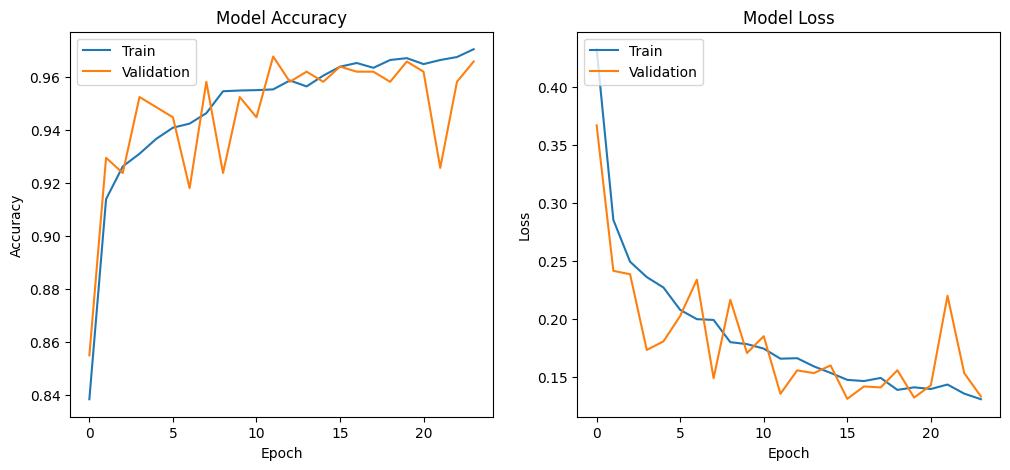

In [20]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_balanced.history['accuracy'])
plt.plot(history_balanced.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_balanced.history['loss'])
plt.plot(history_balanced.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


20/20 [==============================] - 0s 6ms/step - loss: 0.4590 - accuracy: 0.8606
Test accuracy balanced: 0.8605769276618958
20/20 [==============================] - 0s 2ms/step


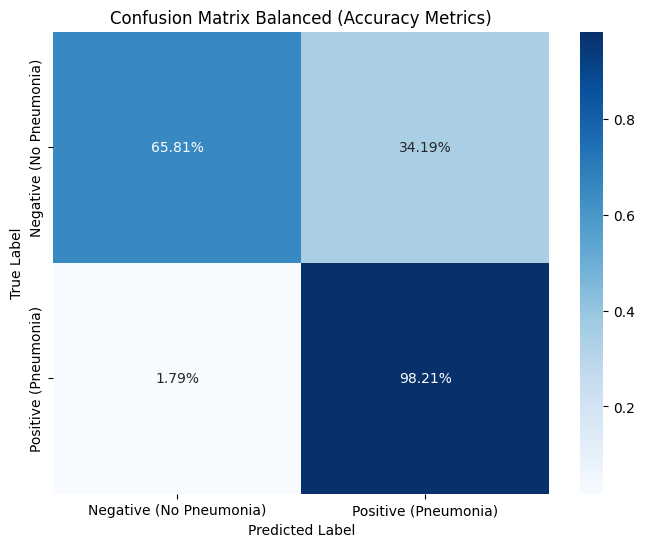

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_loss_balanced, test_acc_balanced = model_balanced.evaluate(test_images_exp, test_labels_conv)
print("Test accuracy balanced:", test_acc_balanced)

predicted_classes_balanced = np.argmax(model_balanced.predict(test_images_exp), axis=1)
true_classes_balanced = np.argmax(test_labels_conv, axis=1)

cm_balanced = confusion_matrix(true_classes_balanced, predicted_classes_balanced)

balanced_TN = cm_balanced[0, 0]
balanced_FP = cm_balanced[0, 1]
balanced_FN = cm_balanced[1, 0]
balanced_TP = cm_balanced[1, 1]

balanced_TN_rate = balanced_TN / (balanced_TN + balanced_FP)
balanced_FP_rate = balanced_FP / (balanced_TN + balanced_FP)
balanced_FN_rate = balanced_FN / (balanced_TP + balanced_FN)
balanced_TP_rate = balanced_TP / (balanced_TP + balanced_FN)

cm_normalized_balanced = np.array([[balanced_TN_rate, balanced_FP_rate], [balanced_FN_rate, balanced_TP_rate]])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized_balanced, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Negative (No Pneumonia)', 'Positive (Pneumonia)'], yticklabels=['Negative (No Pneumonia)', 'Positive (Pneumonia)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Balanced (Accuracy Metrics)')
plt.show()

In [ ]:
# save model 
model_balanced.save("balanced_model_test")

INFO:tensorflow:Assets written to: balanced_model_90/assets


INFO:tensorflow:Assets written to: balanced_model_90/assets
